In [66]:
import numpy as np
import matplotlib.pyplot as plt

class KPZModel:
    def __init__(self, num_nodes, alpha, beta, nu, dt, num_steps):
        self.num_nodes = num_nodes
        self.alpha = alpha  # Nonlinearity parameter
        self.beta = beta    # Diffusion coefficient
        self.nu = nu        # Noise strength
        self.dt = dt        # Time step
        self.num_steps = num_steps
        self.h = np.zeros(num_nodes)  # Initial heights
        self.price_history = np.zeros((num_nodes, num_steps + 1))

    def simulate(self):
        for t in range(1, self.num_steps + 1):
            noise = np.random.normal(scale=np.sqrt(self.dt), size=self.num_nodes)
            h_next = np.copy(self.h)
            # Update using a discretized KPZ-like equation
            for i in range(self.num_nodes):
                left = self.h[i - 1] if i > 0 else 0
                right = self.h[i + 1] if i < self.num_nodes - 1 else 0
                diffusion = (left - 2 * self.h[i] + right)
                nonlinearity = (self.h[i + 1] - self.h[i - 1]) ** 2 if i > 0 and i < self.num_nodes - 1 else 0
                h_next[i] += self.beta * diffusion + self.alpha * nonlinearity + self.nu * noise[i]
            self.h = h_next
            self.price_history[:, t] = self.h

In [72]:
# Parameters
num_nodes = 10
alpha = 0.1  # Nonlinearity parameter
beta = 0.01  # Diffusion coefficient
nu = 0.1     # Noise strength
dt = 1/252   # Time step size 
num_steps = 252  # Number of steps 

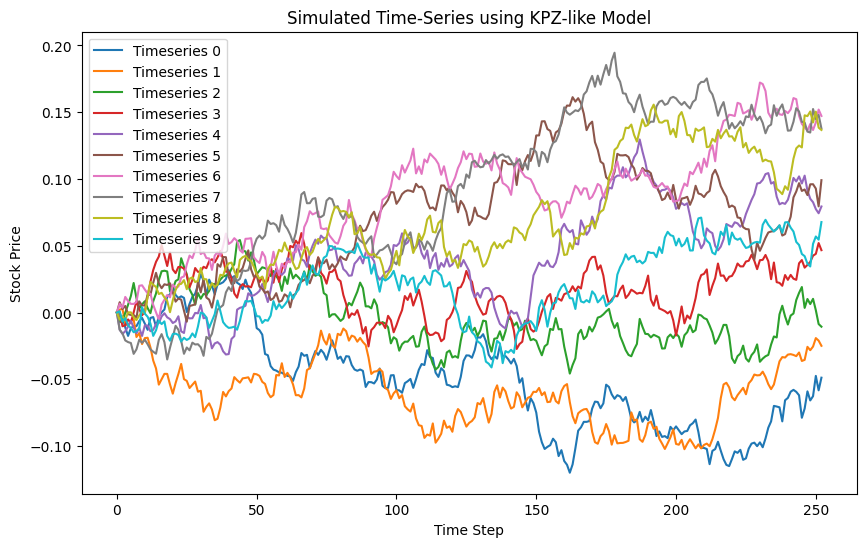

In [74]:
# Create KPZ model and simulate stochastic time-series 
kpz_model = KPZModel(num_nodes=num_nodes, alpha=alpha, beta=beta, nu=nu, dt=dt, num_steps=num_steps)
kpz_model.simulate()

# Plot the simulated timeseries
plt.figure(figsize=(10, 6))
for i in range(num_nodes):
    plt.plot(kpz_model.price_history[i], label=f'Timeseries {i}')
plt.xlabel('Time Step')
plt.ylabel('Stock Price')
plt.title('Simulated Time-Series using KPZ-like Model')
plt.legend()
plt.show()

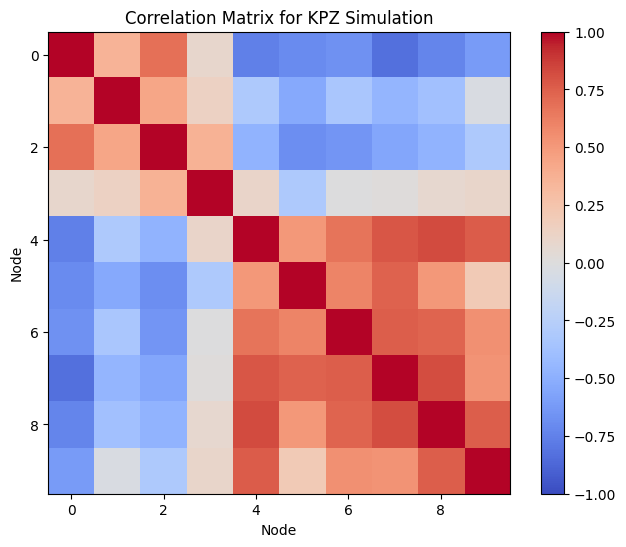

In [76]:
def compute_correlation_matrix(history):
    # Compute the correlation matrix from the  history
    return np.corrcoef(history)

def plot_correlation_matrix(correlation_matrix, title="Correlation Matrix"):
    plt.figure(figsize=(8, 6))
    plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Node')
    plt.ylabel('Node')
    plt.show()

# Example usage after simulation
correlation_matrix = compute_correlation_matrix(kpz_model.price_history)
plot_correlation_matrix(correlation_matrix, title='Correlation Matrix for KPZ Simulation')